In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [38]:
# Impor pustaka yang diperlukan
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from IPython.display import Image
import pydotplus

In [40]:
# Memisahkan fitur (X) dan label (y)
X = iris_data.drop('Species', axis=1)  # Adjust 'Species' to the actual target column name
y = iris_data['Species']

In [7]:
# Membaca dataset dari file CSV
iris_data = pd.read_csv('Iris.csv')

In [8]:
# Menampilkan beberapa baris pertama dari dataset
print(iris_data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [11]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [12]:
# Membuat model Decision Tree
model = DecisionTreeClassifier()

In [13]:
# Melatih model menggunakan data latih
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
# Membuat prediksi menggunakan data uji
y_pred = model.predict(X_test)

In [15]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy:.2f}')

Akurasi: 0.93


In [16]:
# Menampilkan laporan klasifikasi
print('\nLaporan Klasifikasi:\n', classification_report(y_test, y_pred))


Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      0.89      0.89         9
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [22]:
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd

In [25]:
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [29]:
iris = pd.read_csv("Iris.csv")

In [31]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

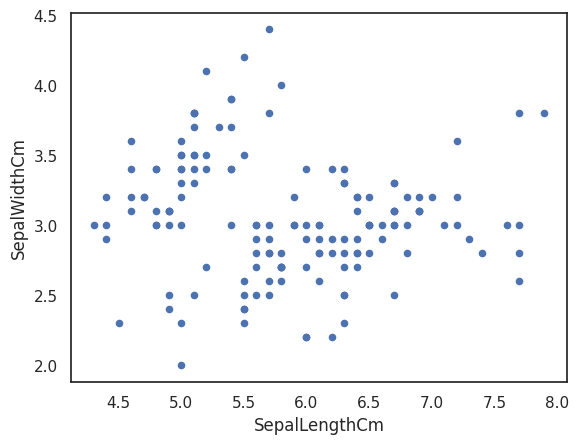

In [32]:
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

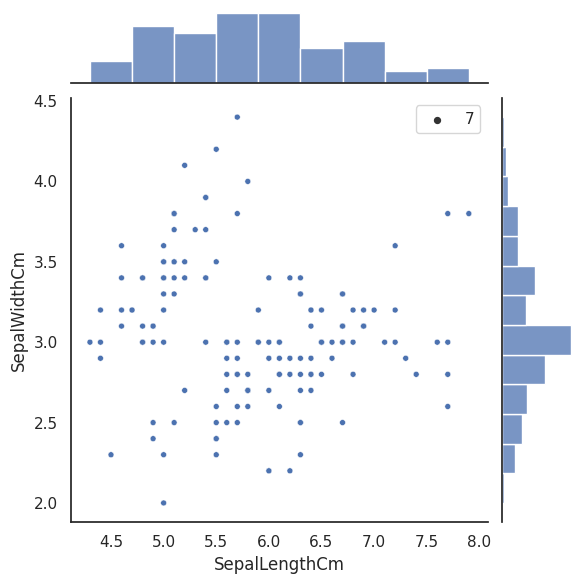

In [34]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=7)

In [42]:
dot_data = export_graphviz(model, out_file=None,
                           class_names=iris_data['Species'].unique(),
                           filled=True, rounded=True, special_characters=True)

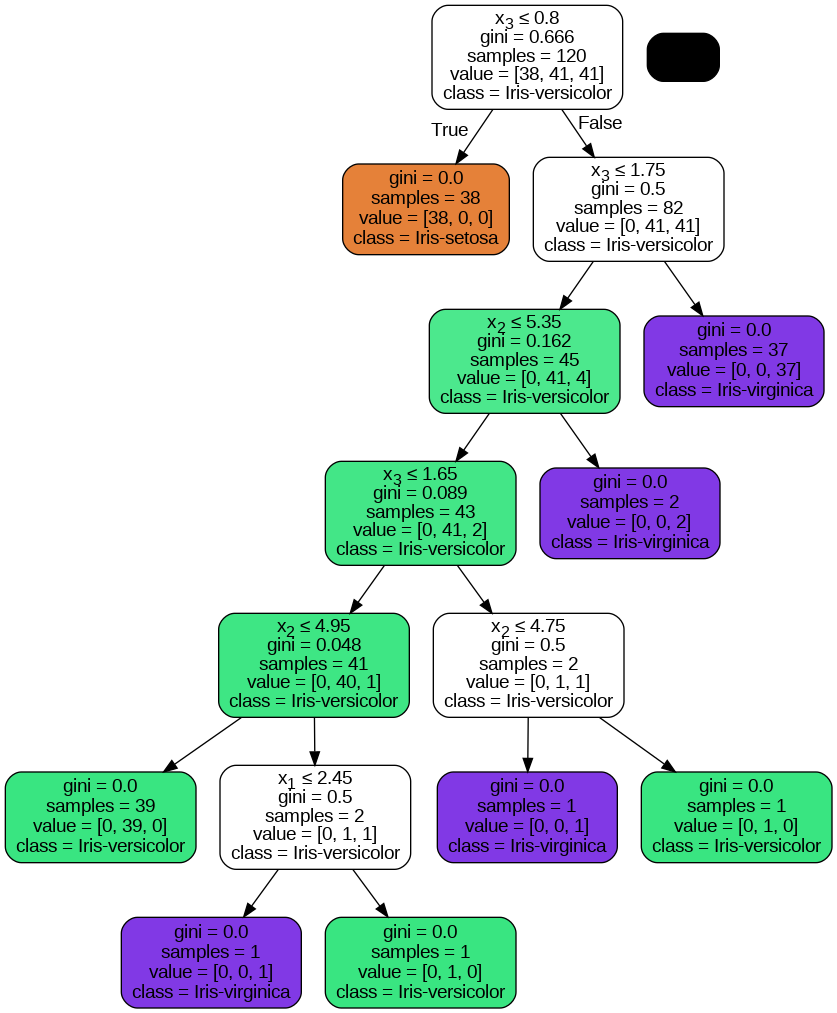

In [43]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())